<a href="https://colab.research.google.com/github/Deepthi40/classification-project-on-social-media-ads-purchasing/blob/main/NLP_with_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CNN/train.txt',sep=';',names=['text','emotion'])

In [ ]:
data.head(10)

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [ ]:
type(data['text'])

pandas.core.series.Series

# Exploratory data analysis

In [ ]:
for temp in data:
    print(temp)
    print(data[temp].isnull().sum())
    print('*'*20)

text
0
********************
emotion
0
********************


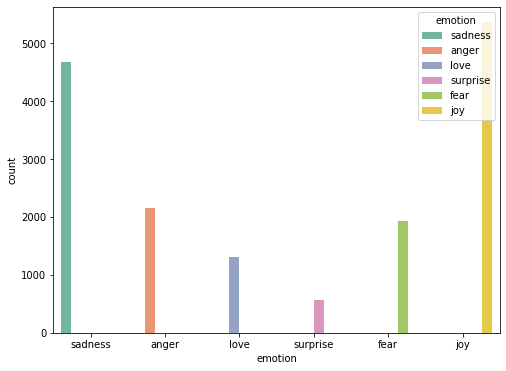

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=data,x=data ['emotion'],hue=data['emotion'],ax=ax,palette="Set2")


**word cloud used to know most frequent words used in text**

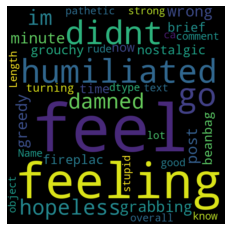

In [ ]:
text=str(data['text'])
wordcloud = WordCloud(width=600,height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***text processing ***

In [ ]:
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def text_process(mess):
  stop_words=set(stopwords.words('english'))
  negative=['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except',
                        'even though', 'yet']
  stop_words=[z for z in stop_words if z not in negative] 
  nopunc = [char for char in mess if char not in string.punctuation] 
  nopunc=''.join(nopunc)
  return [word.lower() for word in nopunc.split() if word.lower() not in stop_words]                     

In [ ]:
text_process("i am ,not happy !i am despite")

['not', 'happy', 'despite']

In [ ]:
data['text']=data['text'].apply(text_process)
data['text'].head()

0                            [didnt, feel, humiliated]
1    [go, feeling, hopeless, damned, hopeful, aroun...
2    [im, grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, fireplace, know, st...
4                                   [feeling, grouchy]
Name: text, dtype: object

In [ ]:
data.head()

,text,emotion
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, aroun...",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, st...",love
4,"[feeling, grouchy]",anger


In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def process2(text):
  reslist = []
  reslist.append(wnl.lemmatize(text))
  return reslist



In [ ]:
process2("mangoes")

['mango']

In [ ]:
data['text'].head().apply(process2)

TypeError: ignored

In [ ]:
train=data.loc[:10000]
test=data.loc[10000:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def reconstruct(x):
  resstr = ' '.join(x)
  return resstr
 

In [ ]:
train['text'] = train['text'].apply(reconstruct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.head()

,text,emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [ ]:
tf = TfidfVectorizer(lowercase=False)

In [ ]:
tf.fit(train['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
message= tf.transform(train['text']).toarray()

In [ ]:
message

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ds = RandomForestClassifier()

In [ ]:
ds.fit(message,train['emotion'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test['text'] = test['text'].apply(reconstruct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_input = tf.transform(test['text']).toarray()

In [ ]:
test.shape

(6000, 2)

In [ ]:
pred_out = ds.predict(test_input)

In [ ]:
pred_out

array(['joy', 'joy', 'sadness', ..., 'joy', 'anger', 'sadness'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred_out,test['emotion'])

0.8766666666666667

In [ ]:
pred_msg = "i was very depressed from last week"

In [ ]:
pred_msg = tf.transform([pred_msg]).toarray()

In [ ]:
pred_msg

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ds.predict(pred_msg)

array(['sadness'], dtype=object)

In [ ]:
pred_msg1="spending time with lovely parents"
pred_msg = tf.transform([pred_msg1]).toarray()
pred_msg
ds.predict(pred_msg)

array(['love'], dtype=object)

In [ ]:
pred_msg1="i will do my best"
pred_msg = tf.transform([pred_msg1]).toarray()
pred_msg
ds.predict(pred_msg)

array(['joy'], dtype=object)